## Cilia classifier tests
This notebook will be used for testing the classifier on the dataset it was trained and on other datasets.

In [15]:
import matplotlib.pyplot as plt
from morphocilia.io import load_rescaled_channel
from morphocilia.quantifier import cilia_props_table
from morphocilia.segmenter import cilia_segmenter_cleaner
from morphocilia.classifier import scaler_classifier
from morphocilia.classifier import scaler_classifier_2
import napari
import numpy as np
import pandas as pd
import joblib
from skimage.measure import regionprops_table
from skimage.io import imread

c:\Users\Lab\.conda\envs\cilia\Lib\site-packages\napari\plugins\_plugin_manager.py:555: UserWarning: Plugin 'napari_skimage_regionprops2' has already registered a function widget 'duplicate current frame' which has now been overwritten
  warn(message=warn_message)


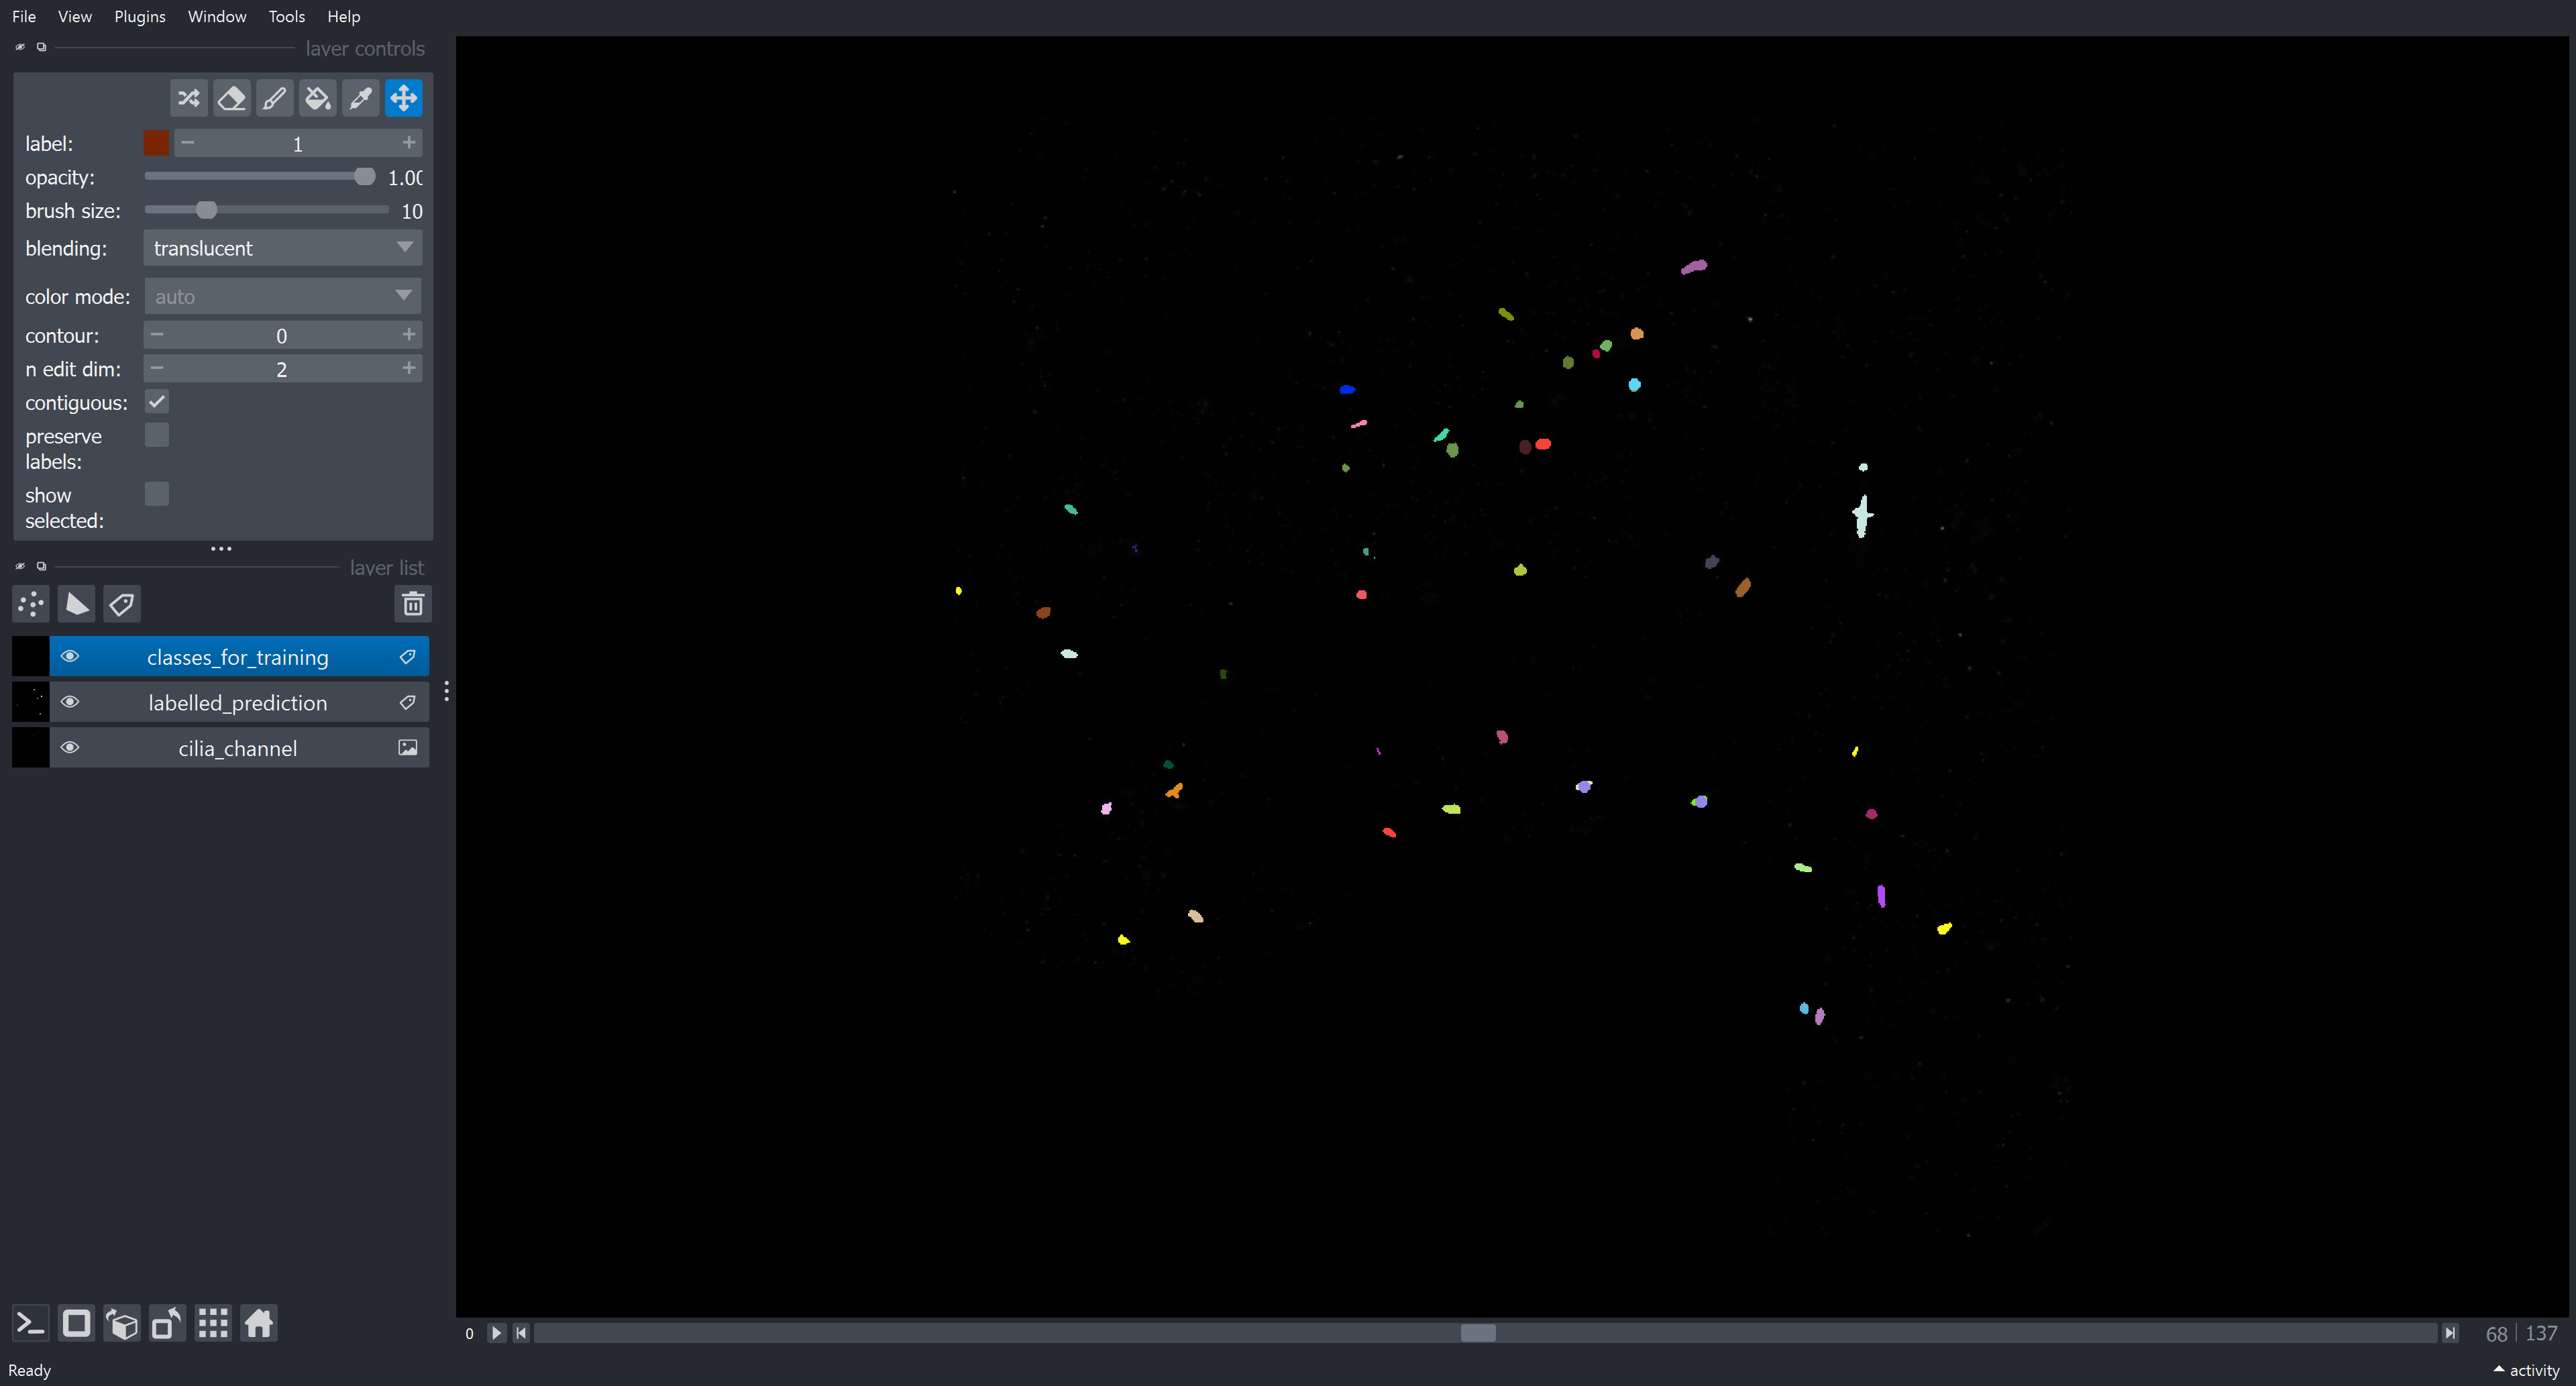

In [16]:
cilia_channel = load_rescaled_channel(
    "../data/20231025_p1_cd13_opn_arl13b.lif", 5, 1
)
classes_for_training = imread("D:/estela/src/classes_for_training.tif")

labelled_prediction = cilia_segmenter_cleaner(cilia_channel)

viewer = napari.Viewer()
viewer.add_image(cilia_channel)
viewer.add_labels(labelled_prediction, opacity=1)
viewer.add_labels(classes_for_training, opacity=1)
napari.utils.nbscreenshot(viewer)

In [17]:
df = cilia_props_table(labelled_prediction, cilia_channel)
df

,label,area,axis_major_length,axis_minor_length,intensity_max,solidity
0,1,716.0,18.318122,8.472275,174.0,0.895000
1,2,831.0,21.056036,8.024543,126.0,0.876582
2,3,740.0,17.675175,8.179033,133.0,0.852535
3,4,585.0,22.392338,6.881370,125.0,0.732165
4,5,458.0,20.205238,4.148056,67.0,0.889320
...,...,...,...,...,...,...
413,414,895.0,21.442694,8.133367,105.0,0.890547
414,415,488.0,14.436040,7.873907,146.0,0.915572
415,416,705.0,19.705175,7.833316,190.0,0.860806
416,417,918.0,21.904988,8.749188,171.0,0.884393


In [18]:
def parse_classes(class_number):
    if class_number == 1:
        return "elongated"
    elif class_number == 2:
        return "looped"
    elif class_number == 3:
        return "fibroblastic"
    elif class_number == 4:
        return "uncertain"
    elif class_number == 0:
        return "NA"
    else:
        raise ValueError

In [19]:
props = regionprops_table(
    labelled_prediction,
    classes_for_training,
    properties=["label", "intensity_max"],
)
data_classes = pd.DataFrame(props).rename(columns={"intensity_max": "classes"})
data_classes["classes"] = data_classes["classes"].apply(parse_classes)
data_classes

,label,classes
0,1,NA
1,2,NA
2,3,NA
3,4,NA
4,5,NA
...,...,...
413,414,NA
414,415,NA
415,416,NA
416,417,NA


In [20]:
complete_dataset = df.merge(right=data_classes, on="label")
complete_dataset

,label,area,axis_major_length,axis_minor_length,intensity_max,solidity,classes
0,1,716.0,18.318122,8.472275,174.0,0.895000,NA
1,2,831.0,21.056036,8.024543,126.0,0.876582,NA
2,3,740.0,17.675175,8.179033,133.0,0.852535,NA
3,4,585.0,22.392338,6.881370,125.0,0.732165,NA
4,5,458.0,20.205238,4.148056,67.0,0.889320,NA
...,...,...,...,...,...,...,...
413,414,895.0,21.442694,8.133367,105.0,0.890547,NA
414,415,488.0,14.436040,7.873907,146.0,0.915572,NA
415,416,705.0,19.705175,7.833316,190.0,0.860806,NA
416,417,918.0,21.904988,8.749188,171.0,0.884393,NA


In [21]:
classification = scaler_classifier(complete_dataset)
classification

D:\estela\libs\morphocilia\morphocilia\classifier.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["scaled_solidity", "scaled_axis_minor_length"]] = pd.DataFrame(
D:\estela\libs\morphocilia\morphocilia\classifier.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["scaled_solidity", "scaled_axis_minor_length"]] = pd.DataFrame(
D:\estela\libs\morphocilia\morphocilia\classifier.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,solidity,axis_minor_length,scaled_solidity,scaled_axis_minor_length,predicted
0,0.895000,8.472275,0.427255,-0.503645,fibroblastic
1,0.876582,8.024543,0.333399,-0.647910,fibroblastic
2,0.852535,8.179033,0.210852,-0.598131,fibroblastic
3,0.732165,6.881370,-0.402546,-1.016253,fibroblastic
4,0.889320,4.148056,0.398312,-1.896959,fibroblastic
...,...,...,...,...,...
413,0.890547,8.133367,0.404564,-0.612845,fibroblastic
414,0.915572,7.873907,0.532090,-0.696446,fibroblastic
415,0.860806,7.833316,0.253002,-0.709525,fibroblastic
416,0.884393,8.749188,0.373202,-0.414421,fibroblastic


In [22]:
def get_color(kind):
    if kind == "elongated":
        return 1
    elif kind == "fibroblastic":
        return 2
    elif kind == "looped":
        return 3
    elif kind == "uncertain":
        return 4
    else:
        return 5

In [23]:
classification["classes"] = classification.predicted.apply(get_color)
classification

C:\Users\Lab\AppData\Local\Temp\ipykernel_10584\1610731520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification["classes"] = classification.predicted.apply(get_color)


,solidity,axis_minor_length,scaled_solidity,scaled_axis_minor_length,predicted,classes
0,0.895000,8.472275,0.427255,-0.503645,fibroblastic,2
1,0.876582,8.024543,0.333399,-0.647910,fibroblastic,2
2,0.852535,8.179033,0.210852,-0.598131,fibroblastic,2
3,0.732165,6.881370,-0.402546,-1.016253,fibroblastic,2
4,0.889320,4.148056,0.398312,-1.896959,fibroblastic,2
...,...,...,...,...,...,...
413,0.890547,8.133367,0.404564,-0.612845,fibroblastic,2
414,0.915572,7.873907,0.532090,-0.696446,fibroblastic,2
415,0.860806,7.833316,0.253002,-0.709525,fibroblastic,2
416,0.884393,8.749188,0.373202,-0.414421,fibroblastic,2


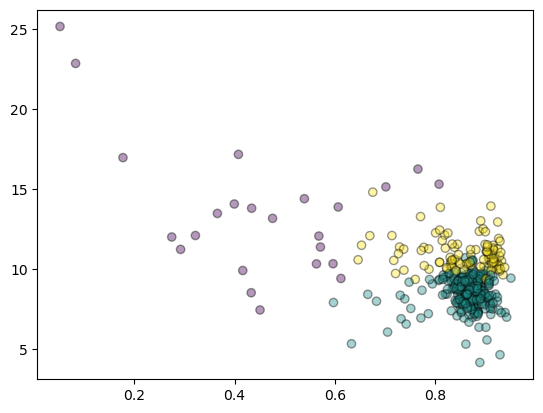

In [24]:
scatter = plt.scatter(
    classification["solidity"],
    classification["axis_minor_length"],
    c=classification["classes"],
    edgecolors="k",
    alpha=0.4,
)

In [25]:
classification.to_csv("cilia_classification.csv", index=False)

After visualising the classification in Napari, we realise some of the cilia are not properly classified. To improve this, we are going to manually classify the cilia found in the border between the three classes (0.6 < solidity< 0.8). The new training image will be used to retrain the classifier in the cilia_classification notebook.

In [26]:
classification["label"] = df["label"]
classification

,solidity,axis_minor_length,scaled_solidity,scaled_axis_minor_length,predicted,classes,label
0,0.895000,8.472275,0.427255,-0.503645,fibroblastic,2,1
1,0.876582,8.024543,0.333399,-0.647910,fibroblastic,2,2
2,0.852535,8.179033,0.210852,-0.598131,fibroblastic,2,3
3,0.732165,6.881370,-0.402546,-1.016253,fibroblastic,2,4
4,0.889320,4.148056,0.398312,-1.896959,fibroblastic,2,5
...,...,...,...,...,...,...,...
413,0.890547,8.133367,0.404564,-0.612845,fibroblastic,2,414
414,0.915572,7.873907,0.532090,-0.696446,fibroblastic,2,415
415,0.860806,7.833316,0.253002,-0.709525,fibroblastic,2,416
416,0.884393,8.749188,0.373202,-0.414421,fibroblastic,2,417


In [13]:
solidity_check = classification.query("0.6< solidity < 0.8")
solidity_check

,solidity,axis_minor_length,scaled_solidity,scaled_axis_minor_length,predicted,classes,label
3,0.733417,6.891721,-0.525239,-0.965335,elongated,1,4
5,0.755253,7.522004,-0.399888,-0.766050,fibroblastic,2,6
10,0.787392,10.062802,-0.215400,0.037308,looped,3,11
63,0.616140,5.337043,-1.198457,-1.456898,elongated,1,64
77,0.729201,11.352100,-0.549441,0.444962,looped,3,78
87,0.668911,8.469260,-0.895526,-0.466543,elongated,1,88
107,0.771420,13.303798,-0.307085,1.062056,looped,3,108
162,0.779910,11.319335,-0.258351,0.434602,looped,3,163
201,0.740487,8.091140,-0.484652,-0.586099,fibroblastic,2,202
205,0.738786,11.239088,-0.494416,0.409230,looped,3,206


In [18]:
solidity_check.to_csv("solidity_check.csv", index=False)

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342
Selected column label
Selected column solidity
Table clicked, set label 4
Table clicked, set label 6
Table clicked, set label 11
Table clicked, set label 77
Table clicked, set label 11
Table clicked, set label 77
Table clicked, set label 87
Table clicked, set label 107
Table clicked, set label 206
Table clicked, set label 261
Table clicked, set label 346
Table clicked, set label 367
Table clicked, set label 372
Table clicked, set label 378
Table clicked, set label 380
Table clicked, set label 407
Table clicked, set label 413
Table clicked, set label 407
Table clicked, set label 370


Now the retrained scaler and classifier will be visualised with Napari.

c:\Users\Lab\.conda\envs\cilia\Lib\site-packages\napari\plugins\_plugin_manager.py:555: UserWarning: Plugin 'napari_skimage_regionprops2' has already registered a function widget 'duplicate current frame' which has now been overwritten
  warn(message=warn_message)


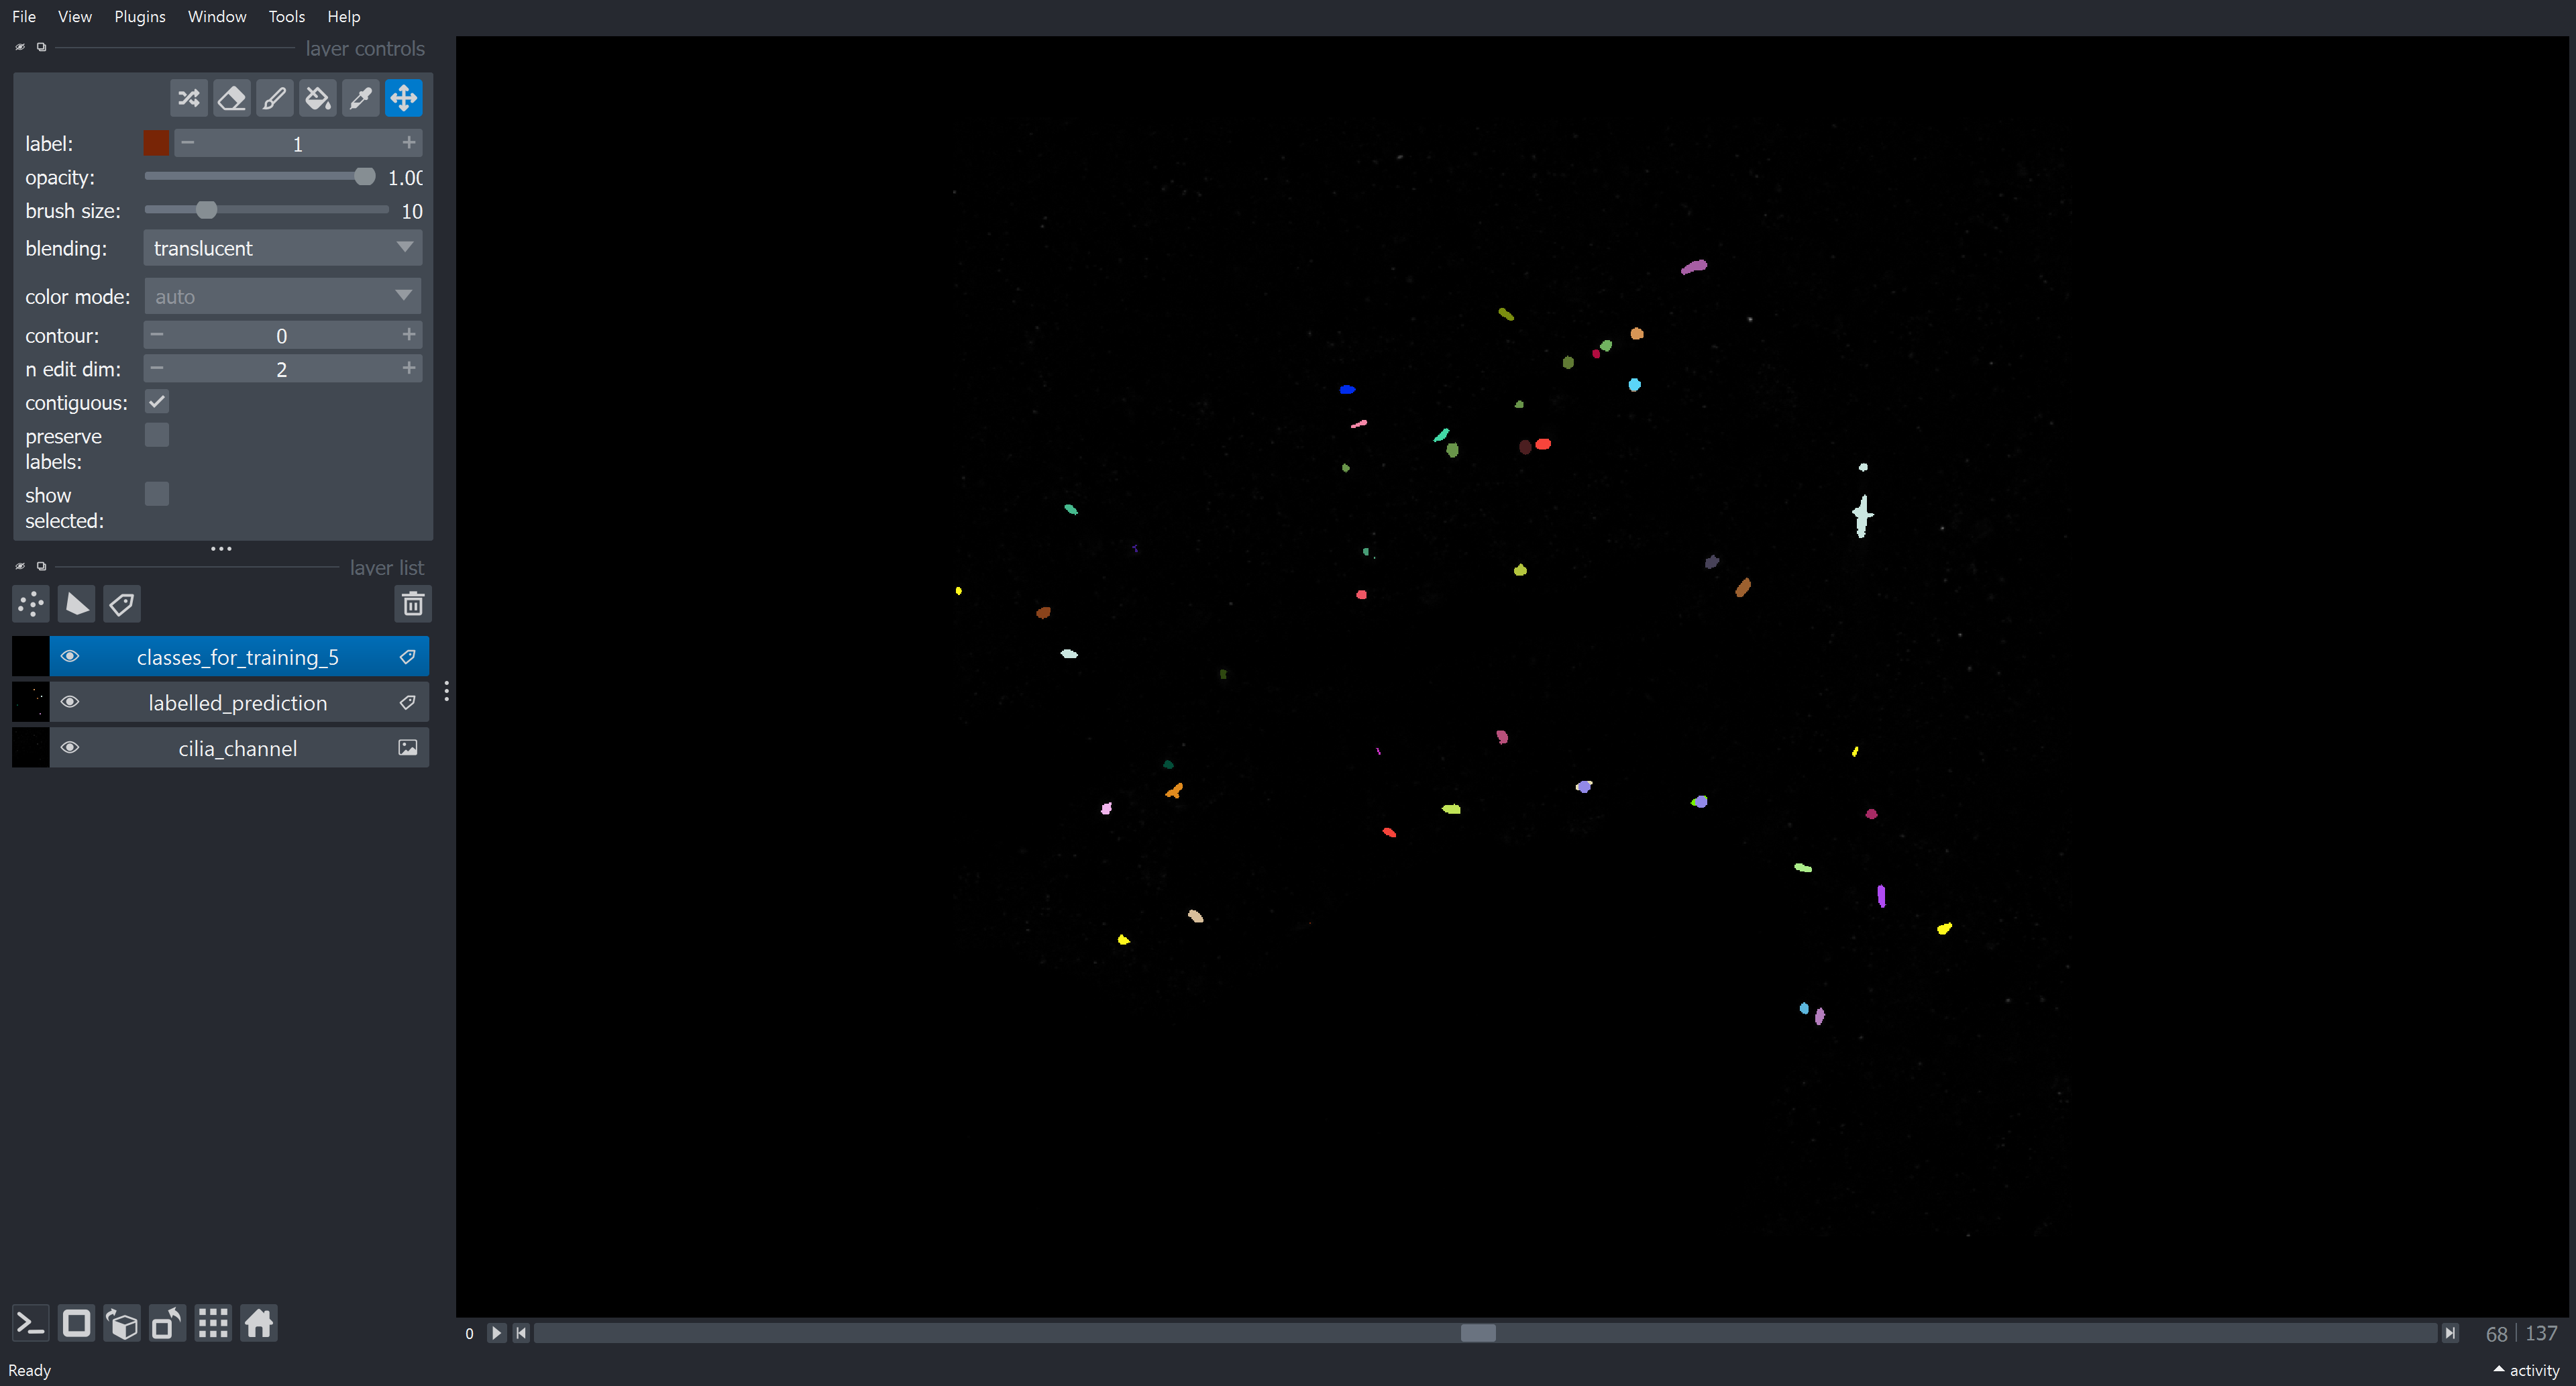

In [27]:
classes_for_training_5 = imread(
    "D:/estela/libs/morphocilia/notebooks/classes_for_training_5.tif"
)

viewer = napari.Viewer()
viewer.add_image(cilia_channel)
viewer.add_labels(labelled_prediction, opacity=1)
viewer.add_labels(classes_for_training_5, opacity=1)
napari.utils.nbscreenshot(viewer)

In [28]:
props_2 = regionprops_table(
    labelled_prediction,
    classes_for_training_5,
    properties=["label", "intensity_max"],
)
data_classes_2 = pd.DataFrame(props_2).rename(
    columns={"intensity_max": "classes"}
)
data_classes_2["classes"] = data_classes_2["classes"].apply(parse_classes)
data_classes_2

,label,classes
0,1,NA
1,2,NA
2,3,NA
3,4,NA
4,5,NA
...,...,...
413,414,NA
414,415,NA
415,416,NA
416,417,NA


In [29]:
complete_dataset_2 = df.merge(right=data_classes_2, on="label")
complete_dataset_2

,label,area,axis_major_length,axis_minor_length,intensity_max,solidity,classes
0,1,716.0,18.318122,8.472275,174.0,0.895000,NA
1,2,831.0,21.056036,8.024543,126.0,0.876582,NA
2,3,740.0,17.675175,8.179033,133.0,0.852535,NA
3,4,585.0,22.392338,6.881370,125.0,0.732165,NA
4,5,458.0,20.205238,4.148056,67.0,0.889320,NA
...,...,...,...,...,...,...,...
413,414,895.0,21.442694,8.133367,105.0,0.890547,NA
414,415,488.0,14.436040,7.873907,146.0,0.915572,NA
415,416,705.0,19.705175,7.833316,190.0,0.860806,NA
416,417,918.0,21.904988,8.749188,171.0,0.884393,NA


In [30]:
classification_2 = scaler_classifier_2(complete_dataset_2)
classification_2

D:\estela\libs\morphocilia\morphocilia\classifier.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["scaled_solidity", "scaled_axis_minor_length"]] = pd.DataFrame(
D:\estela\libs\morphocilia\morphocilia\classifier.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["scaled_solidity", "scaled_axis_minor_length"]] = pd.DataFrame(
D:\estela\libs\morphocilia\morphocilia\classifier.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,solidity,axis_minor_length,scaled_solidity,scaled_axis_minor_length,predicted
0,0.895000,8.472275,0.727643,-0.719263,fibroblastic
1,0.876582,8.024543,0.611244,-0.882452,fibroblastic
2,0.852535,8.179033,0.459264,-0.826144,fibroblastic
3,0.732165,6.881370,-0.301463,-1.299116,uncertain
4,0.889320,4.148056,0.691748,-2.295354,fibroblastic
...,...,...,...,...,...
413,0.890547,8.133367,0.699502,-0.842788,fibroblastic
414,0.915572,7.873907,0.857658,-0.937356,fibroblastic
415,0.860806,7.833316,0.511538,-0.952150,fibroblastic
416,0.884393,8.749188,0.660608,-0.618333,fibroblastic


In [31]:
classification_2["classes"] = classification_2.predicted.apply(get_color)
classification_2

C:\Users\Lab\AppData\Local\Temp\ipykernel_10584\3841578488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_2["classes"] = classification_2.predicted.apply(get_color)


,solidity,axis_minor_length,scaled_solidity,scaled_axis_minor_length,predicted,classes
0,0.895000,8.472275,0.727643,-0.719263,fibroblastic,2
1,0.876582,8.024543,0.611244,-0.882452,fibroblastic,2
2,0.852535,8.179033,0.459264,-0.826144,fibroblastic,2
3,0.732165,6.881370,-0.301463,-1.299116,uncertain,4
4,0.889320,4.148056,0.691748,-2.295354,fibroblastic,2
...,...,...,...,...,...,...
413,0.890547,8.133367,0.699502,-0.842788,fibroblastic,2
414,0.915572,7.873907,0.857658,-0.937356,fibroblastic,2
415,0.860806,7.833316,0.511538,-0.952150,fibroblastic,2
416,0.884393,8.749188,0.660608,-0.618333,fibroblastic,2


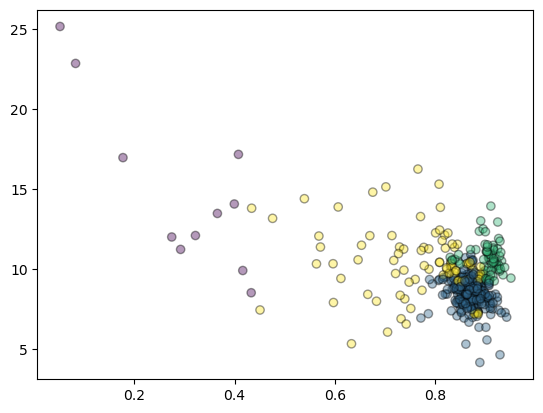

In [32]:
scatter = plt.scatter(
    classification_2["solidity"],
    classification_2["axis_minor_length"],
    c=classification_2["classes"],
    edgecolors="k",
    alpha=0.4,
)

In [22]:
classification_2.to_csv("cilia_classification_2.csv", index=False)

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342
Selected column classes
Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342
Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342
Selected column classes
Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342
